In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# always scaled down the variables when model is distance based

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
# in updated version plot_confusion_matrix is also available
import warnings
warnings.filterwarnings('ignore')

##### whenever regression comes it is based on the distence. or we can say
we plot a graph its a distance based model.

* whenever our variables are graphed we need to make sure that the axis are in
  same range. that means we are talking about scaling here.
* linear regression---> sigmoid function ----> Logistic Regression

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset

# Age and estimated salary, they have different ranges
# We will convert the values of age and estimated salary within the range 0 to 1
# once these values are converted in same range, it is easy to plot.
# this is necessary for the models which are based on distence of values

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


##### purchase is something we are interested in here. whether they will make
      purchase or not. 
        if purchase--> success--> 1
        if not purchase--> failure---> 0
        
        * Purches column is our target variable. which is catagorical.

#### Extracting Variables

In [3]:
X=dataset.iloc[:,[2,3]].values   # features /variables
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [4]:
Y=dataset.iloc[:,4].values # Target variable
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=2/3,random_state=32)

In [7]:
X_train

array([[    33,  69000],
       [    42,  65000],
       [    31,  18000],
       [    48,  74000],
       [    20,  23000],
       [    37,  72000],
       [    45,  45000],
       [    46,  59000],
       [    51,  23000],
       [    37,  93000],
       [    45,  26000],
       [    43, 133000],
       [    25,  33000],
       [    38,  71000],
       [    28,  55000],
       [    42,  90000],
       [    49,  65000],
       [    54,  26000],
       [    37,  71000],
       [    26,  43000],
       [    60,  42000],
       [    48,  90000],
       [    47,  34000],
       [    36,  54000],
       [    45,  22000],
       [    36,  52000],
       [    48,  33000],
       [    26,  52000],
       [    37,  52000],
       [    37,  53000],
       [    32, 100000],
       [    59, 143000],
       [    40,  60000],
       [    37,  75000],
       [    50,  36000],
       [    39,  42000],
       [    41,  63000],
       [    58, 101000],
       [    38,  61000],
       [    42,  79000],


#### Feature scaling

In [8]:
# Scaling the independent variables

standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)

# fitted only on the train dataset.
# transformed both train and test based on it

In [9]:
X_train

array([[-0.42911487, -0.03317888],
       [ 0.46419035, -0.15407724],
       [-0.62762715, -1.57463308],
       [ 1.05972717,  0.11794409],
       [-1.71944464, -1.42351012],
       [-0.03209033,  0.0574949 ],
       [ 0.76195876, -0.75856909],
       [ 0.86121489, -0.3354248 ],
       [ 1.35749557, -1.42351012],
       [-0.03209033,  0.69221134],
       [ 0.76195876, -1.33283634],
       [ 0.56344649,  1.90119503],
       [-1.22316396, -1.1212642 ],
       [ 0.06716581,  0.02727031],
       [-0.92539555, -0.45632317],
       [ 0.46419035,  0.60153756],
       [ 1.1589833 , -0.15407724],
       [ 1.65526398, -1.33283634],
       [-0.03209033,  0.02727031],
       [-1.12390783, -0.81901828],
       [ 2.2508008 , -0.84924287],
       [ 1.05972717,  0.60153756],
       [ 0.96047103, -1.09103961],
       [-0.13134647, -0.48654776],
       [ 0.76195876, -1.45373471],
       [-0.13134647, -0.54699694],
       [ 1.05972717, -1.1212642 ],
       [-1.12390783, -0.54699694],
       [-0.03209033,

* Whatever has been calculated for the training dataset the same statistical
  values i.e. mean, std etc is used to transform the test data here.
* two benifits:
    (1) firstly there is no data leakage, the model doesn,t get any hint any 
        flavor any essence about the test data set at all.
    (2) Our X_test is transformed in the exect same manner as the training 
        dataset. So the transformation remains consistant throughout the data

### instantiating and fitting the model to training dataset

In [16]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)


LogisticRegression()

In [17]:
y_pred=log_reg.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0], dtype=int64)

In [18]:
y_test  # actual y_test values

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [21]:
difference=pd.DataFrame(y_test-y_pred)
difference.value_counts()

# Difference:0-0=0 TN
# Difference:1-1=0  TP
# Difference:1-0=1  FN
# Difference:0-1=-1 FP

# TP+TN=114

 0    114
 1     13
-1      7
dtype: int64

#### Confusion Matrix

In [26]:
conf=confusion_matrix(y_test,y_pred)
conf


array([[74,  7],
       [13, 40]], dtype=int64)

In [29]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8507462686567164


In [30]:
print("Precision:",precision_score(y_test,y_pred))

Precision: 0.851063829787234


In [31]:
print("Recall:",recall_score(y_test,y_pred))

Recall: 0.7547169811320755


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        81
           1       0.85      0.75      0.80        53

    accuracy                           0.85       134
   macro avg       0.85      0.83      0.84       134
weighted avg       0.85      0.85      0.85       134



* for each class individually precision, recall and f1-score is calculated.
* Support: count of observation in dataset that relate to each class 
 ex: 81 records of non purchase
     53 records of purchase
* Accuracy comes from all the true predictions.so there is only one value of
  accuracy.


* Macro avg for precisio=(p(classA)+p(class(b))/2)
 similarly for accuracy and f1-score
* Weighted average=((.91)*81+(.75)*53)/(81+53)
  similarly for accuracy and f1-score

* When to use which average:
    1. Suppose i have two classes and they both have equally 
       distributed( or have almost same in numbers) go with macro avg.
    2. When our classes in our dataset are not equally distributed or they
       are not in equal amounts, they are significantly different at that
        time use weighted avg.
    3. sometimes accuracy misguides we go for other averages.

### ROC and AUC

In [34]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0], dtype=int64)

In [35]:
y_pred_proba=log_reg.predict_proba(X_test)
print(y_pred_proba)

# for the every y predicted there will be some probability associated with it
# Based on these probabilities only predictions are done.
# matric(actual,predicted)
#recall_score(y_test,y_predicted)
# predictions are just approximations of the original probabilities.
# So ROC(y_test,y_pred): it is something which is more finetuned as original 
  # probabilities. so ROc(y_actual, probabilities)
# print(y_pred_proba,y_pred_proba[::,1])

[[0.01016366 0.98983634]
 [0.97013083 0.02986917]
 [0.93360052 0.06639948]
 [0.06840191 0.93159809]
 [0.04854055 0.95145945]
 [0.6769741  0.3230259 ]
 [0.95829933 0.04170067]
 [0.13195169 0.86804831]
 [0.11859357 0.88140643]
 [0.96067008 0.03932992]
 [0.65779746 0.34220254]
 [0.99146972 0.00853028]
 [0.08630966 0.91369034]
 [0.99382655 0.00617345]
 [0.99217162 0.00782838]
 [0.71100361 0.28899639]
 [0.97604078 0.02395922]
 [0.34882082 0.65117918]
 [0.99374865 0.00625135]
 [0.02232072 0.97767928]
 [0.35409727 0.64590273]
 [0.97720436 0.02279564]
 [0.03492051 0.96507949]
 [0.11413448 0.88586552]
 [0.57995133 0.42004867]
 [0.46302971 0.53697029]
 [0.9488691  0.0511309 ]
 [0.93281404 0.06718596]
 [0.14437257 0.85562743]
 [0.5075021  0.4924979 ]
 [0.06384701 0.93615299]
 [0.27178909 0.72821091]
 [0.99063519 0.00936481]
 [0.07359742 0.92640258]
 [0.69936466 0.30063534]
 [0.61119807 0.38880193]
 [0.98860368 0.01139632]
 [0.04646878 0.95353122]
 [0.92803925 0.07196075]
 [0.96503506 0.03496494]


In [36]:
y_pred_proba=y_pred_proba[::,1]
y_pred_proba

array([0.98983634, 0.02986917, 0.06639948, 0.93159809, 0.95145945,
       0.3230259 , 0.04170067, 0.86804831, 0.88140643, 0.03932992,
       0.34220254, 0.00853028, 0.91369034, 0.00617345, 0.00782838,
       0.28899639, 0.02395922, 0.65117918, 0.00625135, 0.97767928,
       0.64590273, 0.02279564, 0.96507949, 0.88586552, 0.42004867,
       0.53697029, 0.0511309 , 0.06718596, 0.85562743, 0.4924979 ,
       0.93615299, 0.72821091, 0.00936481, 0.92640258, 0.30063534,
       0.38880193, 0.01139632, 0.95353122, 0.07196075, 0.03496494,
       0.46838922, 0.0592154 , 0.76472603, 0.00840121, 0.05671517,
       0.95306987, 0.97989803, 0.02012794, 0.56466815, 0.0287822 ,
       0.08559898, 0.53632607, 0.0241377 , 0.11659706, 0.13534547,
       0.00431979, 0.94403464, 0.00296072, 0.90400672, 0.2255508 ,
       0.00359007, 0.32469104, 0.0077297 , 0.86361224, 0.86240694,
       0.08401643, 0.49379306, 0.89165586, 0.0094826 , 0.73617399,
       0.18308504, 0.03539894, 0.86569523, 0.92743281, 0.67446

<function matplotlib.pyplot.show(close=None, block=None)>

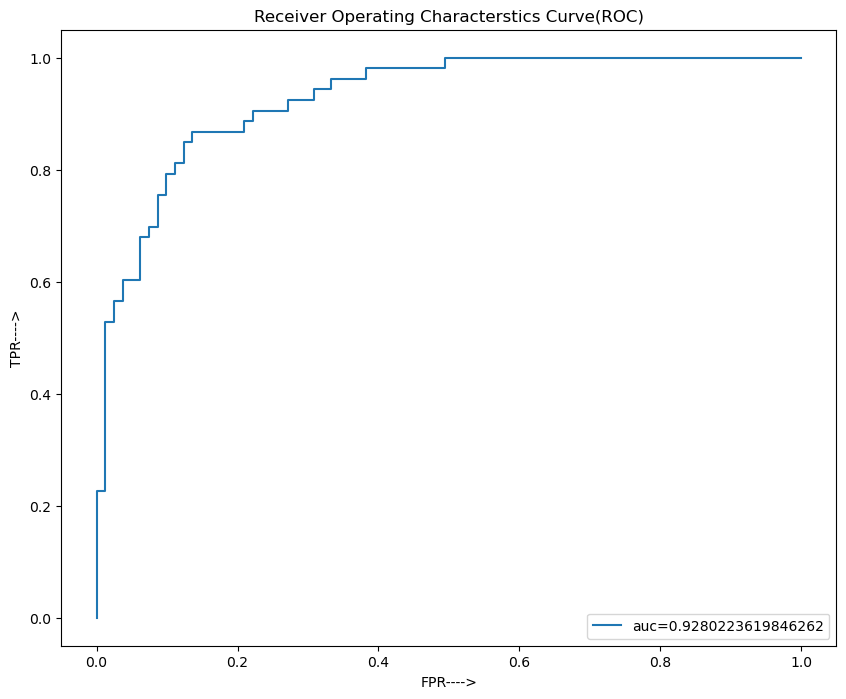

In [44]:
from sklearn import metrics
# metrics.roc_curve return three outputs: tpr and different threshold
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred_proba)  # can use y_pred too

# matrics.roc_auc_score directly return the auc for y_actual and corrosponding
  # prob values of predicted y
auc=metrics.roc_auc_score(y_test,y_pred_proba)

# Plotting the AUC curve
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characterstics Curve(ROC)")
plt.xlabel("FPR---->")
plt.ylabel("TPR---->")
plt.show

In [46]:
auc=metrics.roc_auc_score(y_test,y_pred_proba)
auc

0.9280223619846262

In [47]:
auc=metrics.roc_auc_score(y_test,y_pred)
auc

0.834148614022828

In [49]:
df=pd.DataFrame()
df["TPR"]=tpr
df["FPR"]=fpr
df["Threshold"]=threshold
df

,TPR,FPR,Threshold
0,0.000000,0.000000,1.989836
1,0.018868,0.000000,0.989836
2,0.226415,0.000000,0.944035
3,0.226415,0.012346,0.936153
4,0.528302,0.012346,0.855627
5,0.528302,0.024691,0.808997
6,0.566038,0.024691,0.745923
7,0.566038,0.037037,0.736174
8,0.603774,0.037037,0.709710
9,0.603774,0.061728,0.674461


In [50]:
df.to_excel("Detailed Analysis_fpr_tpr.xlsx")